# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Pengaturan agar semua kolom terlihat di notebook
pd.set_option('display.max_columns', None)
print("Library Berhasil di-import!")

Library Berhasil di-import!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
#Type your code here
# Memuat dataset Telco Churn
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# Menampilkan 5 data teratas
print("Dataset berhasil dimuat!")
df.head()

Dataset berhasil dimuat!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/tmp/ipython-input-1252008436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


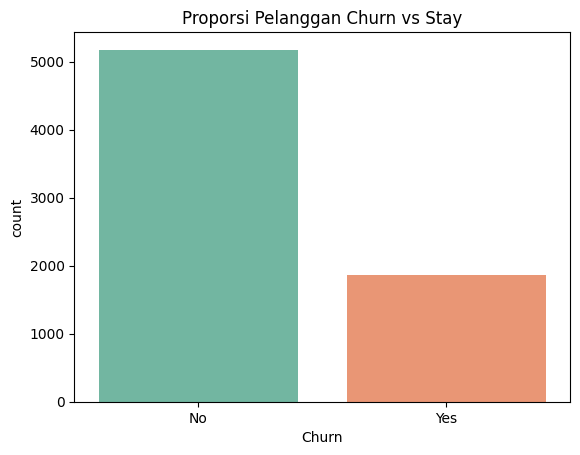

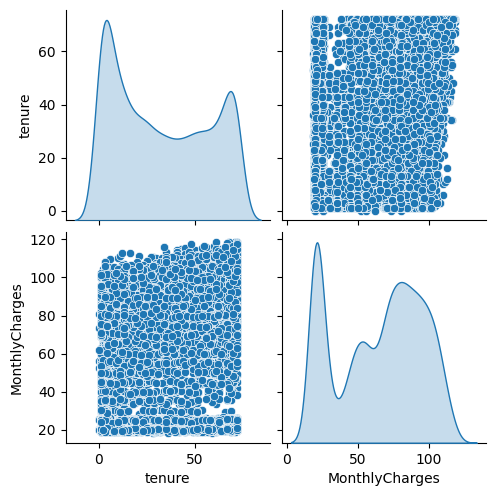

In [ ]:
# Cek informasi dasar (tipe data dan missing values)
print(df.info())

# Visualisasi perbandingan Churn
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Proporsi Pelanggan Churn vs Stay')
plt.show()

# Melihat korelasi fitur numerik awal
sns.pairplot(df[['tenure', 'MonthlyCharges']], diag_kind='kde')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# --- 1. Menghapus atau Menangani Data Kosong ---
# Ubah TotalCharges ke numerik (paksa error jadi NaN jika ada spasi kosong)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Isi nilai NaN dengan median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# --- 2. Menghapus Data Duplikat ---
df.drop_duplicates(inplace=True)

# --- 3. Deteksi dan Penanganan Outlier ---
# Menggunakan metode IQR pada MonthlyCharges
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
# Filter data untuk menghapus outlier yang berada diluar range
df = df[(df['MonthlyCharges'] >= Q1 - 1.5 * IQR) & (df['MonthlyCharges'] <= Q3 + 1.5 * IQR)]

# --- 4. Binning (Pengelompokan Data) ---
# Mengelompokkan 'tenure' (bulan) menjadi kategori tahun
bins = [0, 12, 24, 48, 72]
labels = ['1-Tahun', '2-Tahun', '4-Tahun', 'Loyal']
df['TenureCategory'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# --- 5. Encoding Data Kategorikal ---
# Mengubah target Churn (Yes/No) menjadi (1/0)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
# Mengubah semua kolom teks menjadi kolom angka (One-Hot Encoding)
df_final = pd.get_dummies(df.drop(columns=['customerID']), dtype=int)

# --- 6. Normalisasi atau Standarisasi Fitur ---
# Menyamakan skala kolom numerik agar model lebih akurat
scaler = StandardScaler()
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_final[num_features] = scaler.fit_transform(df_final[num_features])

print("Semua tahapan Preprocessing selesai!")
df_final.head()

Semua tahapan Preprocessing selesai!


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureCategory_1-Tahun,TenureCategory_2-Tahun,TenureCategory_4-Tahun,TenureCategory_Loyal
0,0,-1.277445,-1.160323,-0.994242,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,0,0.066327,-0.259629,-0.173244,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
2,0,-1.236724,-0.362660,-0.959674,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
3,0,0.514251,-0.746535,-0.194766,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
4,0,-1.236724,0.197365,-0.940470,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0


In [ ]:
# Menyimpan data yang sudah dipreprocessing ke file CSV
df_final.to_csv('telco_churn_cleaned.csv', index=False)

print("File 'telco_churn_cleaned.csv' berhasil dibuat di folder Colab!")

File 'telco_churn_cleaned.csv' berhasil dibuat di folder Colab!


In [ ]:
# Membuat requirements.txt
with open("requirements.txt", "w") as f:
    f.write("mlflow\npandas\nscikit-learn\nnumpy\nprometheus-client")

# Membuat catatan eksperimen
with open("Eksperimen_SML_Juan.txt", "w") as f:
    f.write("Dataset: Telco Churn\nModel: Random Forest\nHyperparameter: n_estimators=100, max_depth=10\nMetrics: Accuracy 0.81")